In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import networkx as nx


In [118]:
deal = pd.read_csv("alliances_tech.csv",skiprows=5)
deal.head()

,Entreprise A,Entreprise B,Type d'alliance,Date,Concurrence,Explication alliance,Source,commentaire
0,Adobe,Figma,Tentative d'acquisition,NaN,NaN,Tentative d’acquisition stratégique - annulée,https://www.forbes.fr/business/adobe-met-fin-a...,NaN
1,Alibaba,Baidu,Accord de coopération stratégique,NaN,NaN,Collaboration sur IA générative,https://consent.yahoo.com/v2/collectConsent?se...,NaN
2,Alibaba,Apple,Accord de coopération stratégique,NaN,NaN,Partenariat sur l'IA en Chine,https://www.lesechos.fr/tech-medias/intelligen...,NaN
3,Amazon,Nvidia,Accord de coopération stratégique,NaN,NaN,Partenariat sur cloud et GPU pour IA générativ...,https://www.tradingsat.com/amazoncom-US0231351...,partenaire depuis 14ans
4,Amazon,Verizon,Accord de coopération stratégique,NaN,NaN,Partenariat edge computing 5G,https://www.cnbc.com/2021/10/26/verizon-partne...,NaN


In [6]:
display((deal["Entreprise A"].unique()))

array(['Adobe', 'Alibaba', 'Amazon', 'AMD', 'Anthropic', 'Apple', 'AWS',
       'Baidu', 'Broadcom', 'BYD', 'ByteDance', 'Capgemini', 'Databricks',
       'Ericsson', 'Google', 'Google DeepMind (A)', 'Huawei', 'IBM',
       'Open AI ', 'Intel', 'Lift ', 'Microsoft', 'MediaTek', 'Meta',
       'Netflix', 'Nokia', 'Nvidia', 'Nvidia ', 'OpenAI', 'OpenAI ',
       'Oracle', 'Pinterest', 'Qualcomm', 'Rivian', 'Salesforce',
       'Samsung', 'Snowflake', 'Sony (A)', 'Sony', 'Spotify', 'Tesla',
       'Tesla ', 'Thales', 'TSMC', 'Uber', 'Waymo', 'YouTube', 'Toyota',
       'Honda', 'Cruise', 'Red Hat', 'Arm', ' eMarketingEye', 'PTA',
       'Blue Owl Capital', 'Mercedes ', 'NBA', 'SoftBank Group Corp',
       'ASML'], dtype=object)

In [7]:
display((deal["Entreprise B"].unique()))

array(['Figma', 'Baidu', 'Apple', 'Nvidia', 'Verizon', 'Hugging Face',
       'SAP', 'Anthropic', 'TSMC', 'Salesforce', 'Google Cloud',
       'Broadcom', 'Foxconn', 'Adobe', 'Uber', 'Huawei', 'Deepseek',
       'Amazon', 'Cloud4C', 'WNC', 'DeltaCapita', 'Microsoft', 'Orange',
       'Samsung', 'Oxford University (B)', 'Tencent', 'Vodafone',
       'Red Hat', 'Oracle', 'LinkedIn', 'Scale AI', 'AWS', 'Corewave',
       'Facebook', 'OpenAI', 'AT&T', 'Databricks', 'Darabricks', 'GitHub',
       'GitLab', 'Yahoo', 'Google', 'Arm', 'Intel', 'AMD', 'Alphabet ',
       'ByteDanceUS', 'Qualcomm', 'TSMC (B)', 'Honda', 'Panasonic',
       'Volvo', 'Universal Music', 'Youtube', 'Waymo', 'Cruise', 'GM',
       'Meta', 'BlackRock', 'BharatGen', 'Vodafone Group',
       'Aligned Data Centers', 'Mistral AI'], dtype=object)

In [8]:
deal["Type d'alliance"].value_counts()

Type d'alliance
Accord de coopération stratégique        68
Investissement                           18
Client/fournisseur                       15
Acquisition                               6
Jointventure                              6
Accord de publicité                       4
Petite Acquisition                        3
Tentative d'acquisition                   2
Transfert de propriété intellectuelle     2
Ancien partenariat                        1
FUTUR collab                              1
Name: count, dtype: int64

In [9]:
deal_save= deal

## Nettoyage

In [119]:
deal = deal[
    (deal["Type d'alliance"] != "FUTUR collab") &
    (deal["Type d'alliance"] != "Petite Acquisition") &
    (deal["Type d'alliance"] != "Ancien partenariat") ]

In [120]:
# Liste des termes à remplacer
alphabet_alias = [ "Google", "Waymo","GOOGLE", "google","Google DeepMind", "Google DeepMind (A)", "deepmind", "Google Deep Ming", "Google Cloud" ]
openai_alias =["Open AI", "Open Ai", "OpenAi"]
meta_alias=["meta", "Facebook", "Meta"]
amazon_alias =["AWS"]
YT_alias =["Youtube"]
# Fonction de nettoyage pour supprimer les suffixes entre parenthèses
def remove_parentheses(text):
    return re.sub(r"\s*\([^)]*\)$", "", text) 
    
# Application sur les deux colonnes
for col in ['Entreprise A', 'Entreprise B']:
    deal[col] = deal[col].astype(str).str.strip()            # trim espaces
    deal[col] = deal[col].apply(remove_parentheses)          # enlève parenthèse finale
    deal[col] = deal[col].replace(alphabet_alias, "Alphabet", regex=False)  # remplace variantes Alphabet
    deal[col] = deal[col].replace(openai_alias, "OpenAI", regex=False)  # remplace variantes Alphabet
    deal[col] = deal[col].replace(meta_alias, "Meta", regex=False)  # remplace variantes Alphabet
    deal[col] = deal[col].replace(amazon_alias, "Amazon", regex=False)  # remplace variantes Alphabet
    deal[col] = deal[col].replace(YT_alias, "YouTube", regex=False)  # remplace variantes Alphabet
    deal[col] = deal[col].str.strip()   


display((deal["Entreprise A"].unique()))
display((deal["Entreprise B"].unique()))

array(['Adobe', 'Alibaba', 'Amazon', 'AMD', 'Anthropic', 'Apple', 'Baidu',
       'Broadcom', 'BYD', 'ByteDance', 'Databricks', 'Ericsson',
       'Alphabet', 'Huawei', 'IBM', 'OpenAI', 'Intel', 'Lyft',
       'Microsoft', 'MediaTek', 'Meta', 'Netflix', 'Nokia', 'Nvidia',
       'Oracle', 'Pinterest', 'Qualcomm', 'Rivian', 'Salesforce',
       'Samsung', 'Snowflake', 'Sony', 'Spotify', 'Tesla', 'Thales',
       'TSMC', 'Uber', 'YouTube', 'Toyota', 'Honda', 'Cruise', 'Red Hat',
       'Arm', 'Mercedes-Benz', 'NBA', 'ASML'], dtype=object)

array(['Figma', 'Baidu', 'Apple', 'Nvidia', 'Verizon', 'Hugging Face',
       'SAP', 'Anthropic', 'TSMC', 'Salesforce', 'Alphabet', 'Broadcom',
       'Foxconn', 'Adobe', 'Uber', 'Huawei', 'Deepseek', 'Amazon',
       'Microsoft', 'Orange', 'Samsung', 'Oxford University', 'Tencent',
       'Vodafone Group', 'Red Hat', 'Oracle', 'LinkedIn', 'Scale AI',
       'CoreWeave', 'Meta', 'OpenAI', 'AT&T', 'Databricks', 'GitHub',
       'Yahoo', 'Arm', 'Intel', 'AMD', 'ByteDance', 'Qualcomm', 'Honda',
       'Volvo', 'Universal Music', 'YouTube', 'Cruise', 'General Motors',
       'BharatGen', 'Aligned Data Centers', 'Mistral AI'], dtype=object)

## Graphe non orienté complet

In [121]:
# Créer le graphe non orienté
G = nx.from_pandas_edgelist(deal, 'Entreprise A', 'Entreprise B')
print(f"Nombre d'entreprises : {G.number_of_nodes()} | Nombre d'alliances : {G.number_of_edges()}")


Nombre d'entreprises : 68 | Nombre d'alliances : 102


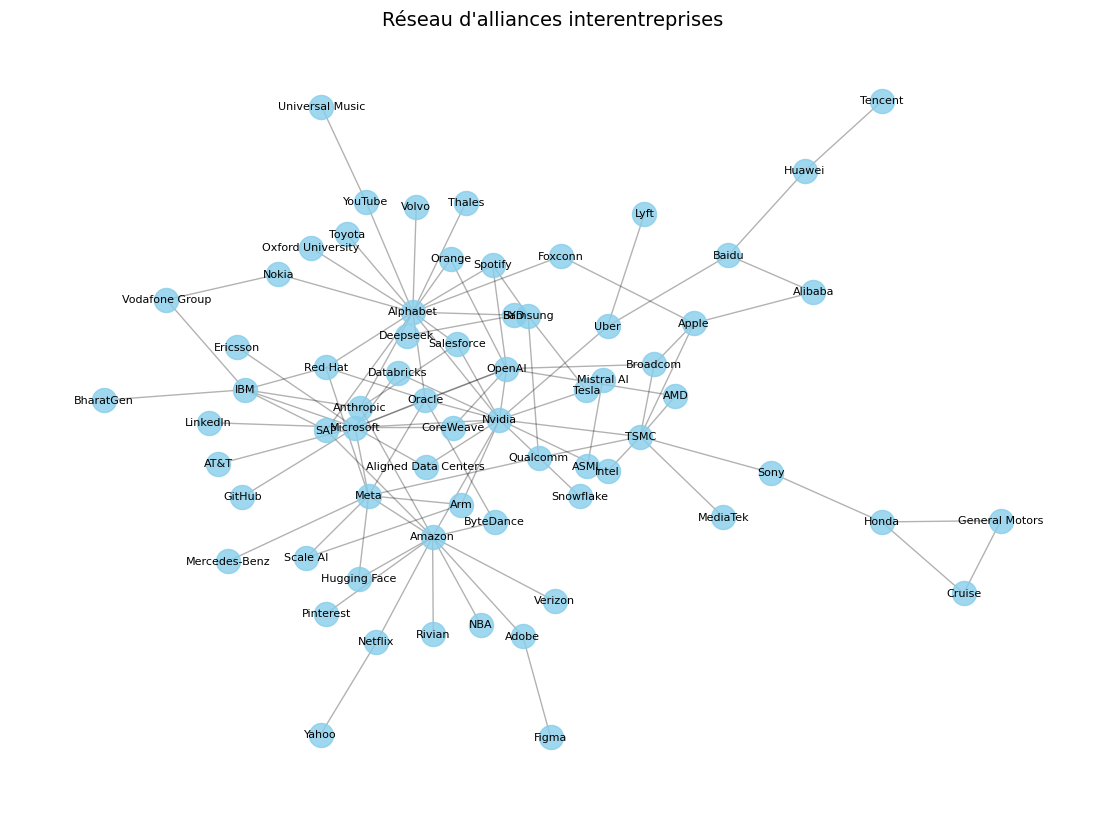

In [122]:
plt.figure(figsize=(14, 10))
pos = nx.kamada_kawai_layout(G, scale=3)  # positionnement esthétique
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Réseau d'alliances interentreprises", fontsize=14)
plt.axis('off')
plt.show()

In [13]:
from pyvis.network import Network

# Créer un réseau interactif
net = Network(height="750px", width="100%", bgcolor="#ffffff", font_color="black")

# Charger les données du graphe NetworkX
net.from_nx(G)

# Options esthétiques
net.force_atlas_2based()  # disposition plus harmonieuse
net.show_buttons(filter_=['physics'])  # pour ajuster l'espacement dans le navigateur
net.write_html("reseau_alliances.html")

## Graphe orienté

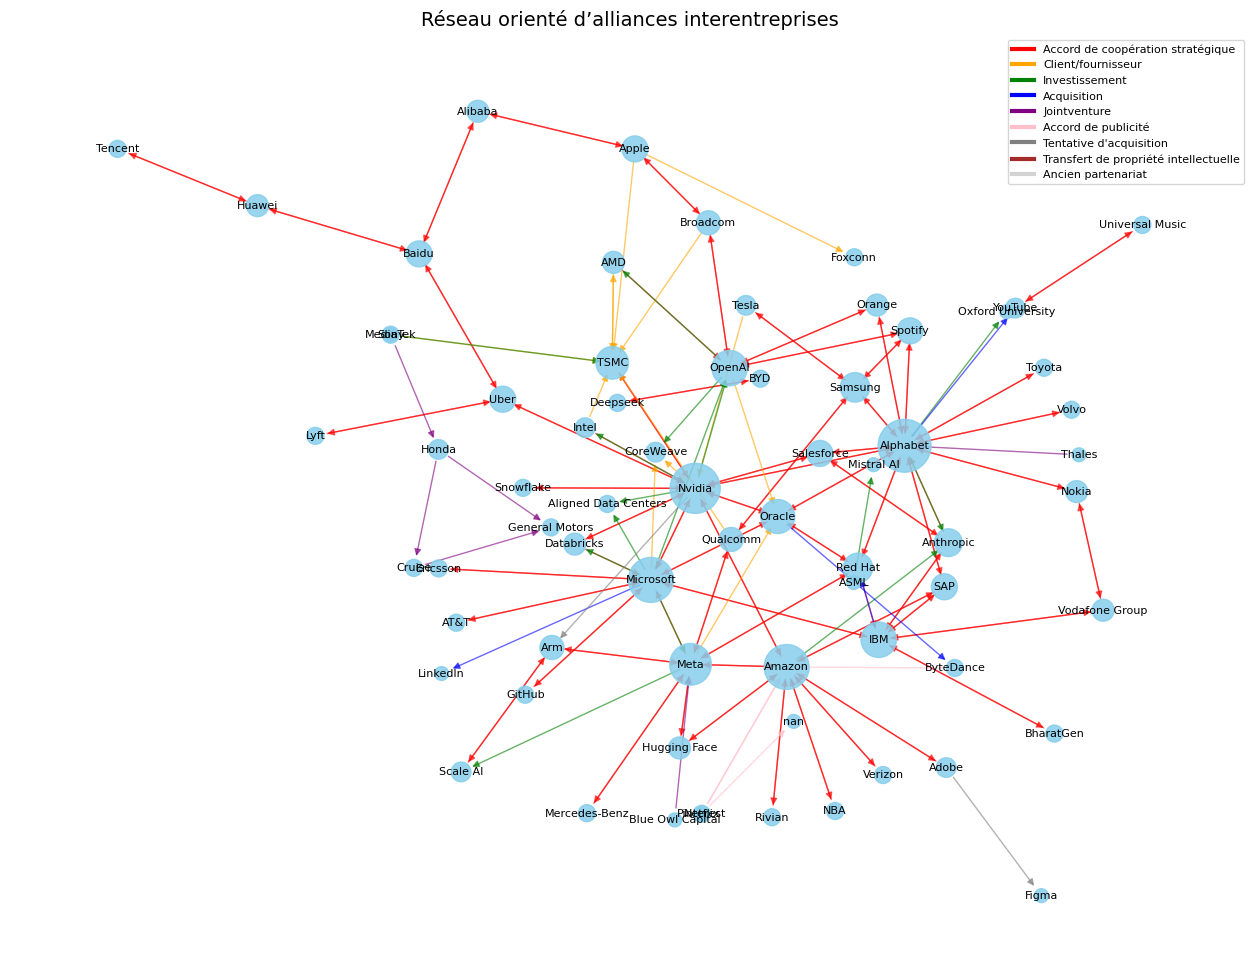

Nombre d’entreprises : 69 | Nombre d’alliances : 169


In [106]:
# Création du graphe orienté
G = nx.DiGraph()

# Dictionnaire de couleurs par type d’alliance
couleurs = {
    "Accord de coopération stratégique": "red",
    "Client/fournisseur": "orange",
    "Investissement": "green",
    "Acquisition": "blue",
    "Jointventure": "purple",
    "Accord de publicité": "pink",
    "Tentative d'acquisition": "grey",
    "Transfert de propriété intellectuelle": "brown",
    "Ancien partenariat": "lightgrey"
}

# Ajout des arêtes selon le type
for _, row in deal.iterrows():
    a, b, type_alliance = row["Entreprise A"], row["Entreprise B"], row["Type d'alliance"]

    if type_alliance == "Accord de coopération stratégique":
        # lien symétrique : les deux directions
        G.add_edge(a, b, type=type_alliance)
        G.add_edge(b, a, type=type_alliance)
    else:
        # lien orienté (A -> B)
        G.add_edge(a, b, type=type_alliance)

# Positionnement des nœuds
pos = nx.kamada_kawai_layout(G, scale=3)

# Taille des nœuds selon le degré
deg = dict(G.degree())
node_sizes = [deg[n]*50 + 50 for n in G.nodes()]

# Nœuds
plt.figure(figsize=(16, 12))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.85)

# Dessiner les arêtes selon leur type
for type_alliance, color in couleurs.items():
    edges = [(u, v) for u, v, d in G.edges(data=True) if d["type"] == type_alliance]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=color, alpha=0.6, arrows=True, arrowsize=10)

# Ajouter les labels
nx.draw_networkx_labels(G, pos, font_size=8)

# Légende manuelle
for type_alliance, color in couleurs.items():
    plt.plot([], [], color=color, label=type_alliance, linewidth=3)
plt.legend(loc="best", fontsize=8)

plt.title("Réseau orienté d’alliances interentreprises", fontsize=14)
plt.axis("off")
plt.show()

print(f"Nombre d’entreprises : {G.number_of_nodes()} | Nombre d’alliances : {G.number_of_edges()}")


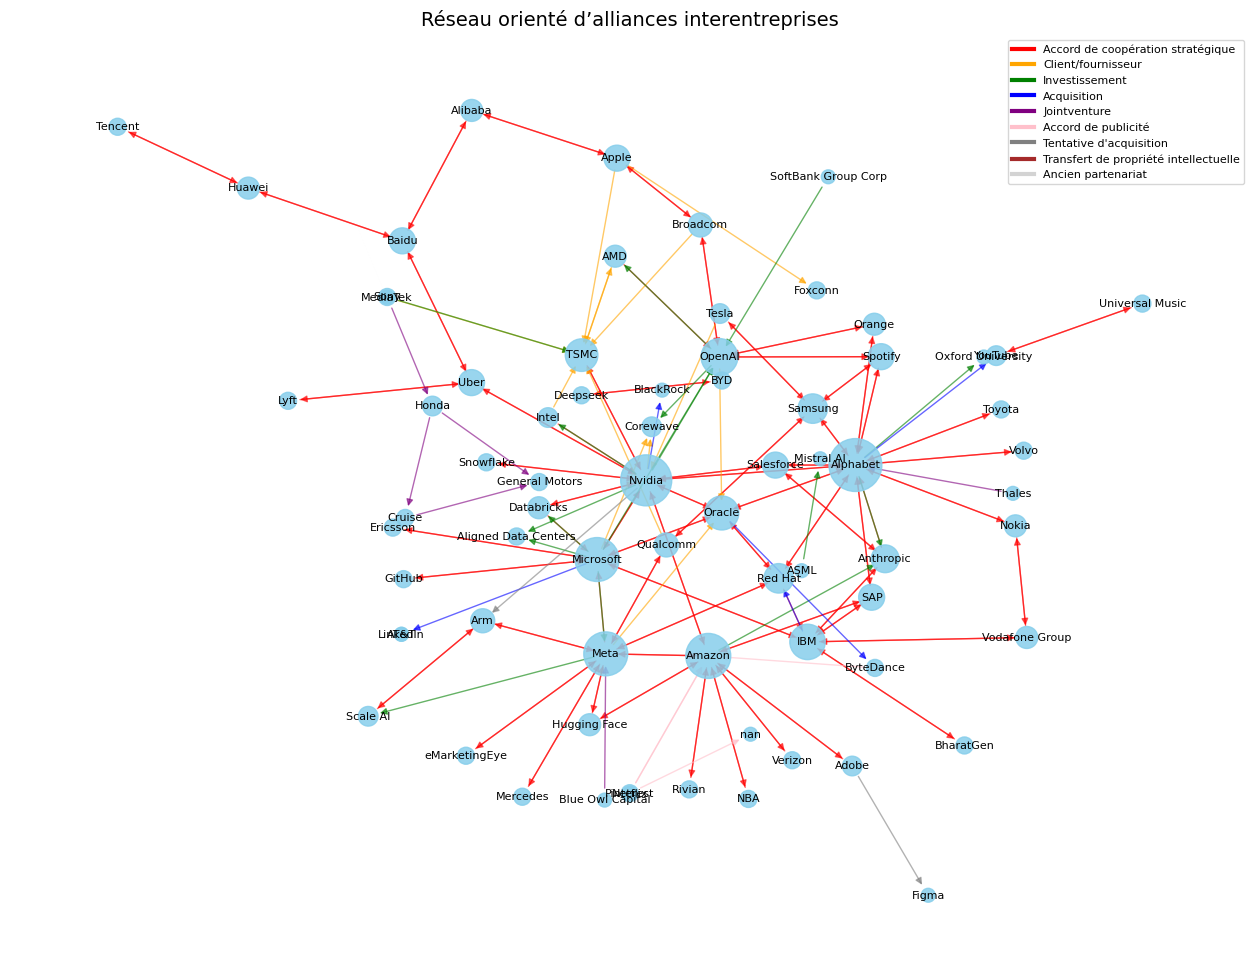

Nombre d’entreprises : 72 | Nombre d’alliances : 172


In [32]:
# --- Création du graphe orienté ---
G = nx.DiGraph()

# Dictionnaire de couleurs par type d’alliance
couleurs = {
    "Accord de coopération stratégique": "red",
    "Client/fournisseur": "orange",
    "Investissement": "green",
    "Acquisition": "blue",
    "Jointventure": "purple",
    "Accord de publicité": "pink",
    "Tentative d'acquisition": "grey",
    "Transfert de propriété intellectuelle": "brown",
    "Ancien partenariat": "lightgrey"
}

# Ajout des arêtes selon le type
for _, row in deal.iterrows():
    a, b, type_alliance = row["Entreprise A"], row["Entreprise B"], row["Type d'alliance"]
    if type_alliance == "Accord de coopération stratégique":
        G.add_edge(a, b, type=type_alliance)
        G.add_edge(b, a, type=type_alliance)
    else:
        G.add_edge(a, b, type=type_alliance)

# --- Positionnement des nœuds ---
pos = nx.kamada_kawai_layout(G, scale=3)

# --- Taille des nœuds proportionnelle au degré ---
deg = dict(G.degree())
# nœud minimum 100, maximum proportionnel au degré
node_sizes = [50 + deg[n]*50 for n in G.nodes()]

# --- Dessin ---
plt.figure(figsize=(16, 12))

# Nœuds
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.85)

# Arêtes par type
for type_alliance, color in couleurs.items():
    edges = [(u, v) for u, v, d in G.edges(data=True) if d["type"] == type_alliance]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=color, alpha=0.6, arrows=True, arrowsize=10)

# Labels
nx.draw_networkx_labels(G, pos, font_size=8)

# Légende
for type_alliance, color in couleurs.items():
    plt.plot([], [], color=color, label=type_alliance, linewidth=3)
plt.legend(loc="best", fontsize=8)

plt.title("Réseau orienté d’alliances interentreprises", fontsize=14)
plt.axis("off")
plt.show()

print(f"Nombre d’entreprises : {G.number_of_nodes()} | Nombre d’alliances : {G.number_of_edges()}")


## Mesures globales : 

In [21]:
# Mesures rapides + viz
G_ud = G.to_undirected()
density = nx.density(G_ud)
components = nx.number_connected_components(G_ud)
giant = G_ud.subgraph(max(nx.connected_components(G_ud), key=len)).copy() if G_ud.number_of_nodes() else G_ud
avg_path = nx.average_shortest_path_length(giant) if (giant.number_of_nodes()>1 and nx.is_connected(giant)) else np.nan
print(f"🌐 Densité={density:.4f} | Composantes={components} | Dist. moyenne={(avg_path if not np.isnan(avg_path) else 'N/A')}")

deg = dict(G.degree())
btw = nx.betweenness_centrality(G_ud, normalized=True)
clo = nx.closeness_centrality(G_ud)
df_meas = pd.DataFrame({
    "Company": list(G.nodes()),
    "Degree": [deg[n] for n in G.nodes()],
    "Betweenness": [btw.get(n,0) for n in G.nodes()],
    "Closeness": [clo.get(n,0) for n in G.nodes()]
}).sort_values(["Degree","Betweenness"], ascending=[False,False])

print("🏆 Top 10 par degré:")
print(df_meas.head(10))

# --- Mesures globales (robustes) ---
# Pour un graphe orienté, on calcule les mesures de "connectivité" sur la version non orientée
G_ud = G.to_undirected()

# composantes faibles (non orienté)
components = list(nx.connected_components(G_ud)) if G_ud.number_of_nodes() else []
num_components = len(components)
giant = G_ud.subgraph(max(components, key=len)).copy() if components else G_ud

# densité
density = nx.density(G_ud)

# distance moyenne (sur la composante géante uniquement)
if giant.number_of_nodes() > 1 and nx.is_connected(giant):
    avg_path = nx.average_shortest_path_length(giant)
else:
    avg_path = np.nan

# diamètre (sur la composante géante ; défini seulement si connectée et >1 nœud)
try:
    diameter = nx.diameter(giant) if giant.number_of_nodes() > 1 and nx.is_connected(giant) else np.nan
except nx.NetworkXError:
    diameter = np.nan

# (bonus souvent demandé) rayon du réseau (sur la composante géante)
try:
    radius = nx.radius(giant) if giant.number_of_nodes() > 1 and nx.is_connected(giant) else np.nan
except nx.NetworkXError:
    radius = np.nan

# (bonus utile) clustering global (transitivity) sur non orienté
transitivity = nx.transitivity(G_ud) if G_ud.number_of_nodes() > 0 else np.nan

# (optionnel) mesures de forte connexité (composantes fortement connexes pour le graphe orienté)
num_strong_cc = nx.number_strongly_connected_components(G) if G.number_of_nodes() > 0 else 0

print(f"""
🌐 Mesures globales
- Densité (non orienté)              : {density:.4f}
- Composantes faibles (non orienté)  : {num_components}
- Composantes fortement connexes (→) : {num_strong_cc}
- Distance moyenne (giant)           : {avg_path if not np.isnan(avg_path) else 'N/A'}
- Diamètre (giant)                   : {diameter if not np.isnan(diameter) else 'N/A'}
- Rayon (giant)                      : {radius if not np.isnan(radius) else 'N/A'}
- Transitivité (clustering global)   : {transitivity:.4f}
""".strip())


🌐 Densité=0.0396 | Composantes=3 | Dist. moyenne=3.372256728778468
🏆 Top 10 par degré:
      Company  Degree  Betweenness  Closeness
14   Alphabet      28     0.260546   0.395268
6      Nvidia      26     0.415985   0.465851
5      Amazon      20     0.228359   0.383642
24  Microsoft      20     0.178182   0.390534
38       Meta      19     0.134127   0.368470
32     OpenAI      13     0.077971   0.366400
29        IBM      12     0.058484   0.319702
33     Oracle      11     0.055358   0.395268
12       TSMC      10     0.162137   0.360327
31    Red Hat       8     0.020872   0.339683
🌐 Mesures globales
- Densité (non orienté)              : 0.0396
- Composantes faibles (non orienté)  : 3
- Composantes fortement connexes (→) : 25
- Distance moyenne (giant)           : 3.372256728778468
- Diamètre (giant)                   : 8
- Rayon (giant)                      : 4
- Transitivité (clustering global)   : 0.1029


### Investissement

# --- Création du graphe orienté ---
G = nx.DiGraph()

# Dictionnaire de couleurs par type d’alliance
couleurs = {
    "Investissement": "green",
}

# Ajout des arêtes selon le type
for _, row in deal.iterrows():
    a, b, type_alliance = row["Entreprise A"], row["Entreprise B"], row["Type d'alliance"]
    if type_alliance == "Investissement":
        G.add_edge(a, b, type=type_alliance)
    
# --- Positionnement des nœuds ---
pos = nx.kamada_kawai_layout(G, scale=3)

# --- Taille des nœuds proportionnelle au degré ---
deg = dict(G.degree())
# nœud minimum 100, maximum proportionnel au degré
node_sizes = [50 + deg[n]*50 for n in G.nodes()] # ce serait bien de mettre les noeuds à la taille de la capitalisation boursière de l'entreprise

# --- Dessin ---
plt.figure(figsize=(16, 12))

# Nœuds
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.85)

# Arêtes par type
for type_alliance, color in couleurs.items():
    edges = [(u, v) for u, v, d in G.edges(data=True) if d["type"] == type_alliance]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=color, alpha=0.6, arrows=True, arrowsize=10)

# Labels
nx.draw_networkx_labels(G, pos, font_size=8)

# Légende
for type_alliance, color in couleurs.items():
    plt.plot([], [], color=color, label=type_alliance, linewidth=3)
plt.legend(loc="best", fontsize=8)

plt.title("Réseau orienté d’alliances interentreprises", fontsize=14)
plt.axis("off")
plt.show()

print(f"Nombre d’entreprises : {G.number_of_nodes()} | Nombre d’alliances : {G.number_of_edges()}")


## Intégration des attributs :

In [113]:
info = pd.read_csv("companies_raw.csv")
info.head()

,Entreprises,ISIN,Pays,CA,Budget R&D,Taille entreprise,Secteur activité premier,Actionnaire majoritaire,OUI,NON
0,Microsoft,US5949181045,US,"281,724 Md$ 2025","32, 488 Md$",Grande (228000 employés),Logiciel,Vanguard,True,False
1,Alphabet,US02079K3059 (Class A) / US02079K1079 (Class C),US,"350,018 Md$ 2025","48, 789 Md$",Grande (187103 employés),Logiciel,Vanguard,True,False
2,Amazon,US0231351067,US,"637,959 Md$ 2024","88.54 Md$ (FY2024; ""Technology & Content"")",Grande (1546000 employés),e commerce,Jeff Bezos,True,False
3,Nvidia,US67066G1040,US,130.5 Md$ (FY2025),12.914 Md$ (FY2025),Grande (36000 employés),Electronique,Vanguard,True,False
4,Oracle,US68389X1054,US,"57,399 Md$ 2025","9,860 Md$ 2025",Grande (162000 employés),Cloud,Ellison,True,False


🎯 Attributs trouvés pour 39 nœuds sur 75.
📦 Tous les nœuds contiennent maintenant les mêmes attributs (même vides).


## Etude par pays

C:\Users\Admin\AppData\Local\Temp\ipykernel_852\3614940399.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab20", len(pays_uniques))  # Colormap automatique


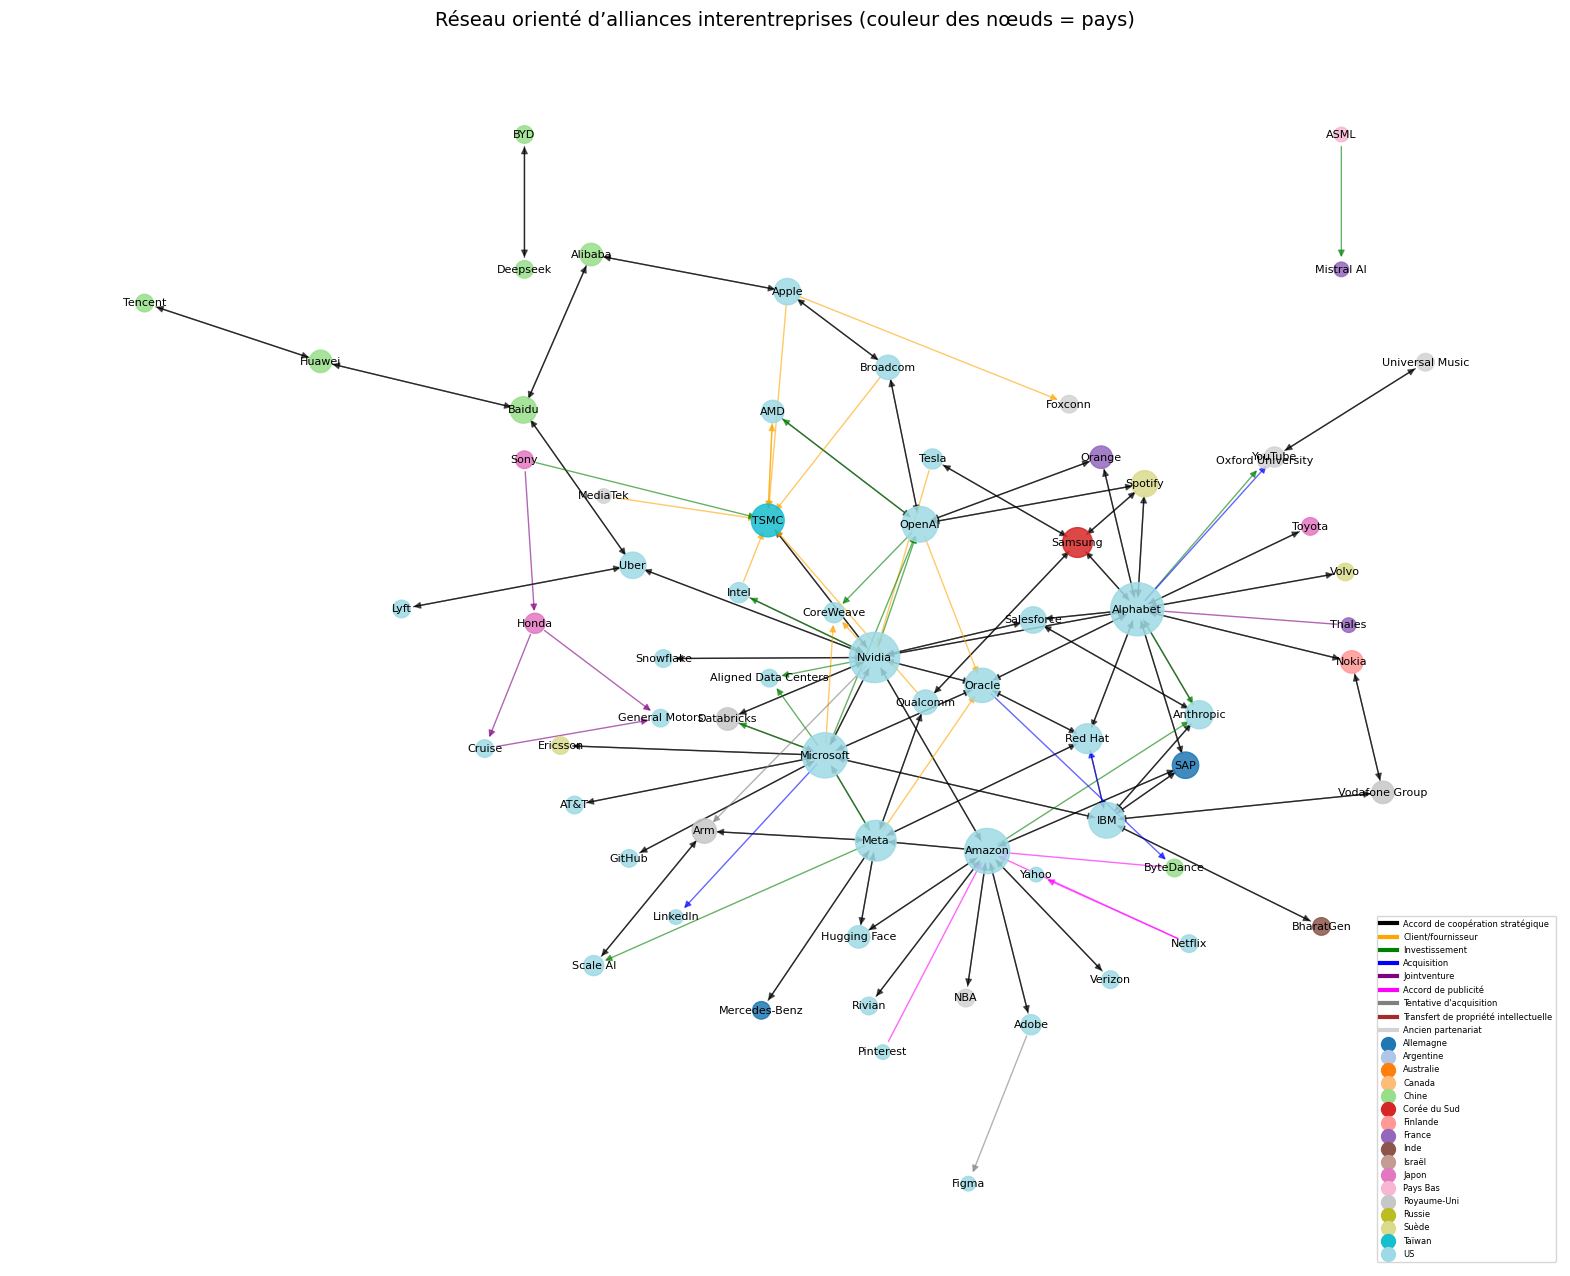

Nombre d’entreprises : 68 | Nombre d’alliances : 168


In [147]:
# --- Création du graphe orienté ---
Gpays = nx.DiGraph()

# Dictionnaire de couleurs par type d’alliance (arêtes)
couleurs = {
    "Accord de coopération stratégique": "black",
    "Client/fournisseur": "orange",
    "Investissement": "green",
    "Acquisition": "blue",
    "Jointventure": "purple",
    "Accord de publicité": "fuchsia",
    "Tentative d'acquisition": "grey",
    "Transfert de propriété intellectuelle": "brown",
    "Ancien partenariat": "lightgrey"
}

# --- Ajout des arêtes ---
for _, row in deal.iterrows():
    a, b, type_alliance = row["Entreprise A"], row["Entreprise B"], row["Type d'alliance"]
    if type_alliance == "Accord de coopération stratégique":
        Gpays.add_edge(a, b, type=type_alliance)
        Gpays.add_edge(b, a, type=type_alliance)
    else:
        Gpays.add_edge(a, b, type=type_alliance)

# --- Couleur des nœuds selon le pays ---
# On crée un dictionnaire {entreprise: pays}
pays_dict = pd.Series(info["Pays"].values, index=info["Entreprises"]).to_dict()

# Palette de couleurs automatique pour les pays
pays_uniques = sorted(info["Pays"].dropna().unique())
cmap = plt.cm.get_cmap("tab20", len(pays_uniques))  # Colormap automatique
couleur_pays = {p: cmap(i) for i, p in enumerate(pays_uniques)}

# Couleur de chaque nœud (gris clair si pays inconnu)
node_colors = [couleur_pays.get(pays_dict.get(n, None), "lightgrey") for n in Gpays.nodes()]

# --- Positionnement des nœuds ---
pos = nx.kamada_kawai_layout(Gpays, scale=4)
pos['Mistral AI'] = [2.3, 3] 
pos['ASML'] = [2.3, 4]  
pos['BYD'] = [-2, 4] 
pos['Deepseek'] = [-2, 3]  # lremplacement des noeuds mal placés
pos['MediaTek'][0] += 0.6
pos['Pinterest']=[-0.11334493, -2.80485164]
pos['Sony']=[-2,  1.5881756]

# --- Taille des nœuds proportionnelle au degré ---
deg = dict(Gpays.degree())
node_sizes = [60 + deg[n]*50 for n in Gpays.nodes()]

# --- Dessin ---
plt.figure(figsize=(20, 16))

# Nœuds colorés par pays
nx.draw_networkx_nodes(Gpays, pos, node_size=node_sizes, node_color=node_colors, alpha=0.85)

# Arêtes colorées par type d’alliance
for type_alliance, color in couleurs.items():
    edges = [(u, v) for u, v, d in Gpays.edges(data=True) if d["type"] == type_alliance]
    nx.draw_networkx_edges(Gpays, pos, edgelist=edges, edge_color=color, alpha=0.6, arrows=True, arrowsize=10)

# Labels
nx.draw_networkx_labels(Gpays, pos, font_size=8)

# --- Légendes ---
# 1. Légende des types d’alliance
for type_alliance, color in couleurs.items():
    plt.plot([], [], color=color, label=type_alliance, linewidth=3)
# 2. Légende des pays
for p, c in couleur_pays.items():
    plt.scatter([], [], color=c, label=p, s=100)

plt.legend(loc="best", fontsize=6)

plt.title("Réseau orienté d’alliances interentreprises (couleur des nœuds = pays)", fontsize=14)
plt.axis("off")
plt.savefig("reseau_alliances_pays.png", dpi=300, bbox_inches="tight") 
plt.show()

print(f"Nombre d’entreprises : {Gpays.number_of_nodes()} | Nombre d’alliances : {Gpays.number_of_edges()}")


In [72]:
pos['General Motors']

array([-0.94885736,  0.16281177])

## Etude par domaines

C:\Users\Admin\AppData\Local\Temp\ipykernel_852\3391417515.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Set3", len(secteur_uniques))  # Colormap automatique


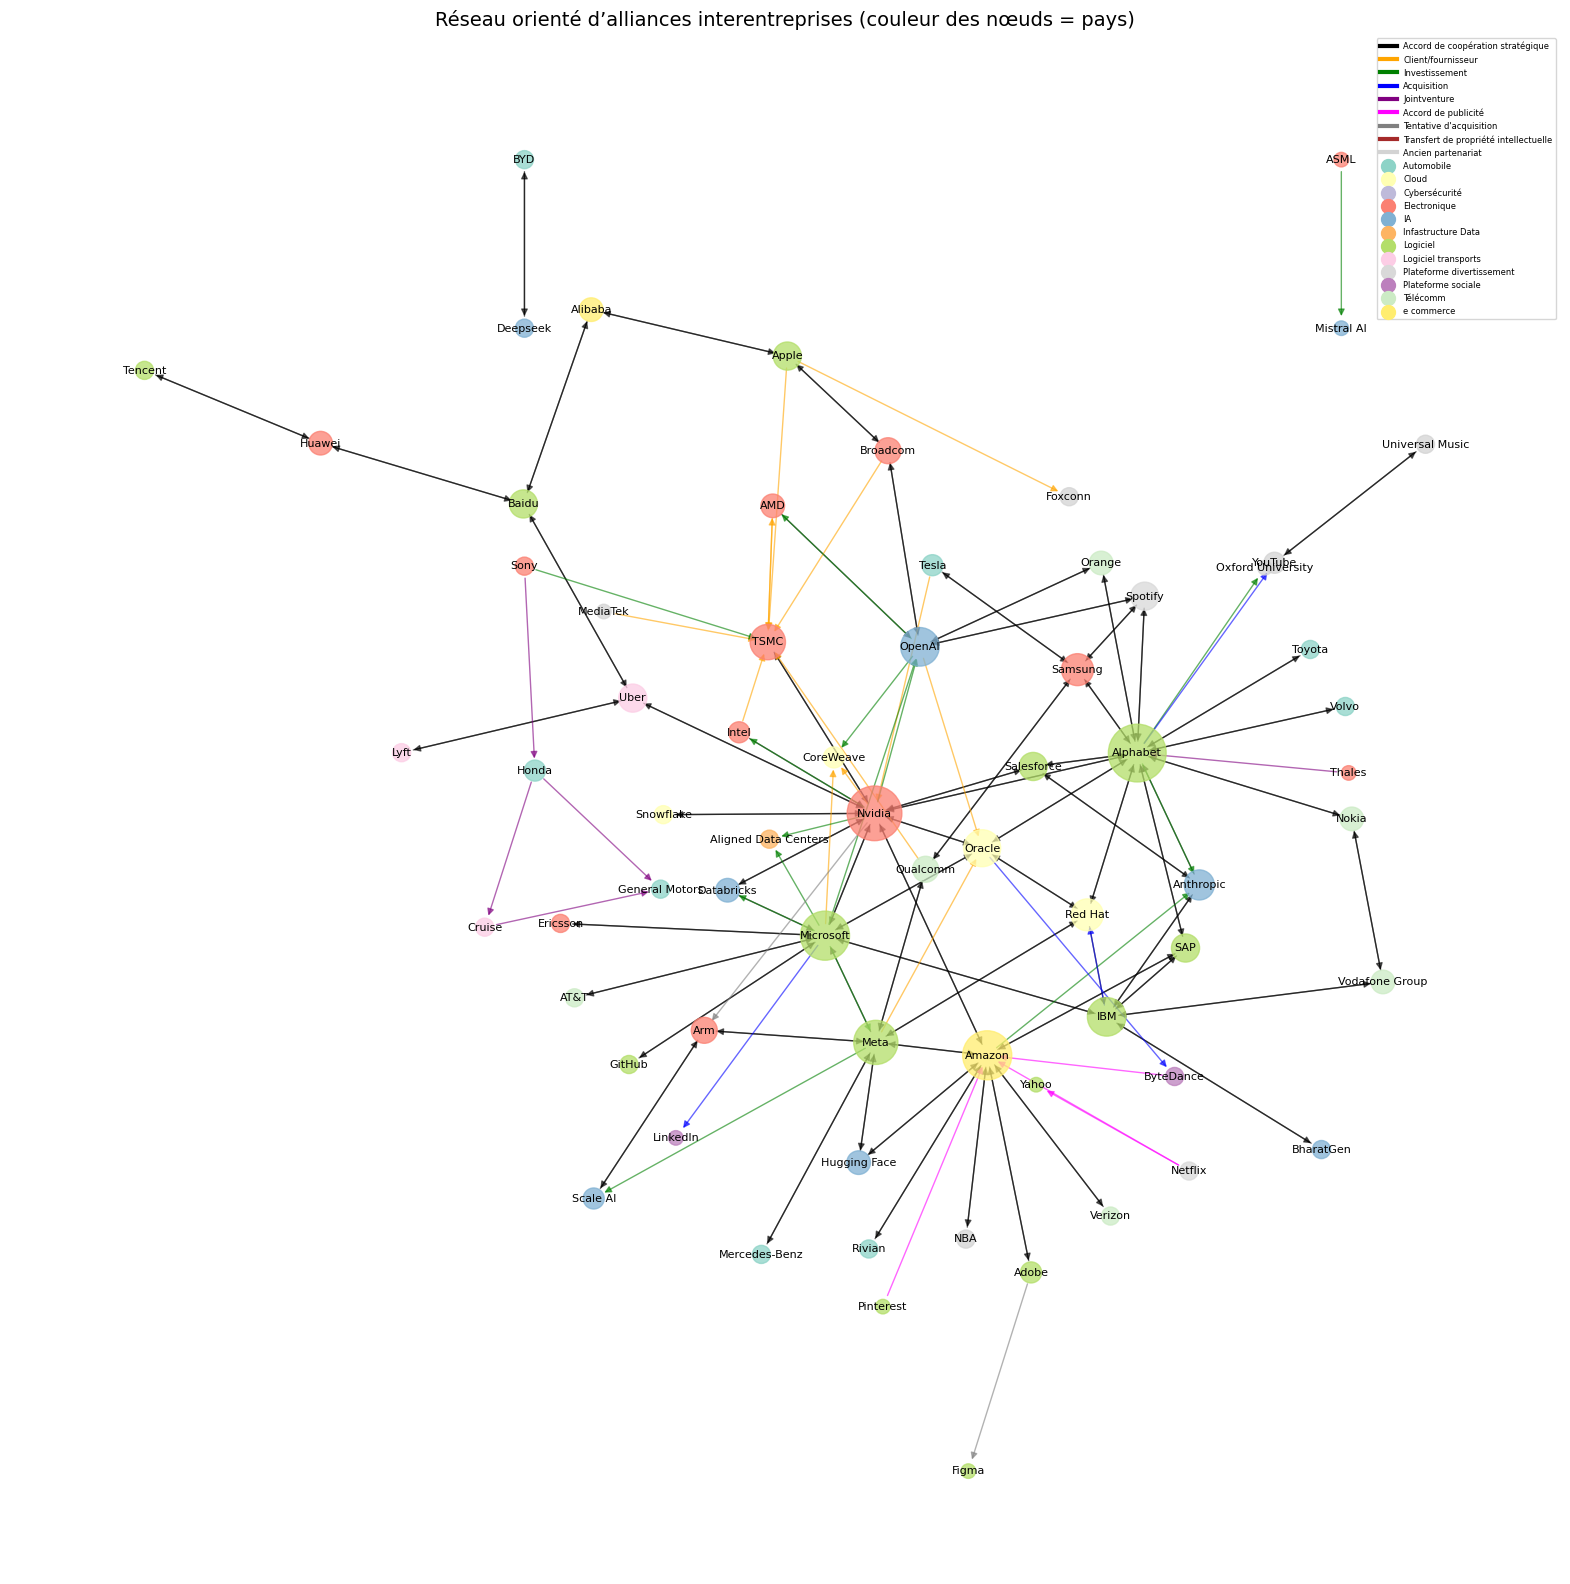

Nombre d’entreprises : 68 | Nombre d’alliances : 168


In [146]:
# --- Création du graphe orienté ---
Gsecteur = nx.DiGraph()

# Dictionnaire de couleurs par type d’alliance (arêtes)
couleurs = {
    "Accord de coopération stratégique": "black",
    "Client/fournisseur": "orange",
    "Investissement": "green",
    "Acquisition": "blue",
    "Jointventure": "purple",
    "Accord de publicité": "fuchsia",
    "Tentative d'acquisition": "grey",
    "Transfert de propriété intellectuelle": "brown",
    "Ancien partenariat": "lightgrey"
}

# --- Ajout des arêtes ---
for _, row in deal.iterrows():
    a, b, type_alliance = row["Entreprise A"], row["Entreprise B"], row["Type d'alliance"]
    if type_alliance == "Accord de coopération stratégique":
        Gsecteur.add_edge(a, b, type=type_alliance)
        Gsecteur.add_edge(b, a, type=type_alliance)
    else:
        Gsecteur.add_edge(a, b, type=type_alliance)

# --- Couleur des nœuds selon le pays ---
# On crée un dictionnaire {entreprise: secteur}
secteur_dict = pd.Series(info['Secteur activité premier '].values, index=info["Entreprises"]).to_dict()

# Palette de couleurs automatique pour les pays
secteur_uniques = sorted(info['Secteur activité premier '].dropna().unique())
cmap = plt.cm.get_cmap("Set3", len(secteur_uniques))  # Colormap automatique
couleur_secteur = {p: cmap(i) for i, p in enumerate(secteur_uniques)}

# Couleur de chaque nœud (gris clair si pays inconnu)
node_colors = [couleur_secteur.get(secteur_dict.get(n, None), "lightgrey") for n in Gsecteur.nodes()]

# --- Positionnement des nœuds ---
pos = nx.kamada_kawai_layout(Gsecteur, scale=4)

# remplacement des noeuds mal placés
pos['Mistral AI'] = [2.3, 3] 
pos['ASML'] = [2.3, 4]  
pos['BYD'] = [-2, 4] 
pos['Deepseek'] = [-2, 3]  
pos['Pinterest']=[-0.11334493, -2.80485164]
pos['Sony']=[-2,  1.5881756]
pos['MediaTek'][0] += 0.6

# --- Taille des nœuds proportionnelle au degré ---
deg = dict(Gsecteur.degree())
node_sizes = [50 + deg[n]*60 for n in Gsecteur.nodes()]

# --- Dessin ---
plt.figure(figsize=(20, 20))

# Nœuds colorés par pays
nx.draw_networkx_nodes(Gsecteur, pos, node_size=node_sizes, node_color=node_colors, alpha=0.75)

# Arêtes colorées par type d’alliance
for type_alliance, color in couleurs.items():
    edges = [(u, v) for u, v, d in Gpays.edges(data=True) if d["type"] == type_alliance]
    nx.draw_networkx_edges(Gsecteur, pos, edgelist=edges, edge_color=color, alpha=0.6, arrows=True, arrowsize=10)

# Labels
nx.draw_networkx_labels(Gsecteur, pos, font_size=8)

# --- Légendes ---
# 1. Légende des types d’alliance
for type_alliance, color in couleurs.items():
    plt.plot([], [], color=color, label=type_alliance, linewidth=3)
# 2. Légende des pays
for p, c in couleur_secteur.items():
    plt.scatter([], [], color=c, label=p, s=100)

plt.legend(loc="best", fontsize=6)

plt.title("Réseau orienté d’alliances interentreprises (couleur des nœuds = pays)", fontsize=14)
plt.axis("off")
plt.savefig("reseau_alliances_secteur.png", dpi=300, bbox_inches="tight")  # haute résolution, sans marges inutiles
plt.show()

print(f"Nombre d’entreprises : {Gpays.number_of_nodes()} | Nombre d’alliances : {Gpays.number_of_edges()}")


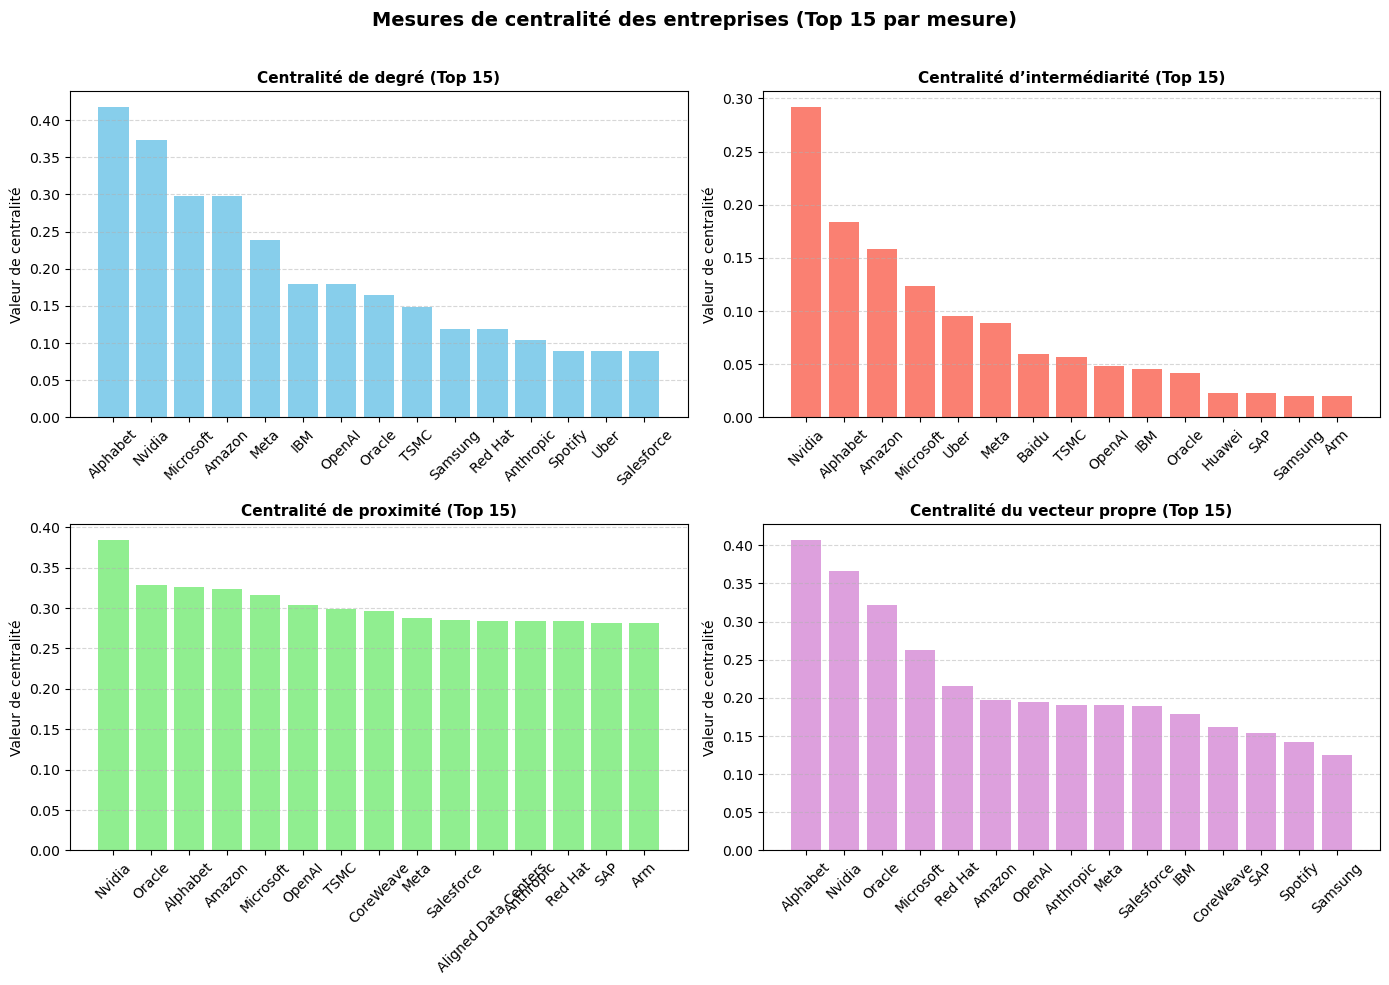

In [148]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# --- (1) Calcul des mesures de centralité ---
deg_centrality = nx.degree_centrality(Gpays)
bet_centrality = nx.betweenness_centrality(Gpays)
clos_centrality = nx.closeness_centrality(Gpays)
eig_centrality = nx.eigenvector_centrality(Gpays, max_iter=1000)

# --- (2) Conversion en DataFrame ---
df_centrality = pd.DataFrame({
    "Degré": deg_centrality,
    "Intermédiarité": bet_centrality,
    "Proximité": clos_centrality,
    "Vecteur propre": eig_centrality
})

# --- (3) Création des sous-graphiques ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Palette cohérente et titres
colors = ["skyblue", "salmon", "lightgreen", "plum"]
titles = [
    "Centralité de degré (Top 15)",
    "Centralité d’intermédiarité (Top 15)",
    "Centralité de proximité (Top 15)",
    "Centralité du vecteur propre (Top 15)"
]

# --- (4) Tracer les barplots triés individuellement ---
for i, (col, color, title) in enumerate(zip(df_centrality.columns, colors, titles)):
    top15 = df_centrality[col].sort_values(ascending=False).head(15)
    axes[i].bar(top15.index, top15.values, color=color)
    axes[i].set_title(title, fontsize=11, weight="bold")
    axes[i].set_ylabel("Valeur de centralité")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

# --- (5) Ajustement de la mise en page ---
plt.suptitle("Mesures de centralité des entreprises (Top 15 par mesure)", fontsize=14, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("centralites_top15_par_mesure.png", dpi=300, bbox_inches="tight")
plt.show()


## Mesures globales : 

In [25]:
import numpy as np
import networkx as nx

# --- Mesures globales (robustes) ---
# Pour un graphe orienté, on calcule les mesures de "connectivité" sur la version non orientée
G_ud = G.to_undirected()

# composantes faibles (non orienté)
components = list(nx.connected_components(G_ud)) if G_ud.number_of_nodes() else []
num_components = len(components)
giant = G_ud.subgraph(max(components, key=len)).copy() if components else G_ud

# densité
density = nx.density(G_ud)

# distance moyenne (sur la composante géante uniquement)
if giant.number_of_nodes() > 1 and nx.is_connected(giant):
    avg_path = nx.average_shortest_path_length(giant)
else:
    avg_path = np.nan

# diamètre (sur la composante géante ; défini seulement si connectée et >1 nœud)
try:
    diameter = nx.diameter(giant) if giant.number_of_nodes() > 1 and nx.is_connected(giant) else np.nan
except nx.NetworkXError:
    diameter = np.nan

# (bonus souvent demandé) rayon du réseau (sur la composante géante)
try:
    radius = nx.radius(giant) if giant.number_of_nodes() > 1 and nx.is_connected(giant) else np.nan
except nx.NetworkXError:
    radius = np.nan

# (bonus utile) clustering global (transitivity) sur non orienté
transitivity = nx.transitivity(G_ud) if G_ud.number_of_nodes() > 0 else np.nan

# (optionnel) mesures de forte connexité (composantes fortement connexes pour le graphe orienté)
num_strong_cc = nx.number_strongly_connected_components(G) if G.number_of_nodes() > 0 else 0

print(f"""
🌐 Mesures globales
- Densité (non orienté)              : {density:.4f}
- Composantes faibles (non orienté)  : {num_components}
- Composantes fortement connexes (→) : {num_strong_cc}
- Distance moyenne (giant)           : {avg_path if not np.isnan(avg_path) else 'N/A'}
- Diamètre (giant)                   : {diameter if not np.isnan(diameter) else 'N/A'}
- Rayon (giant)                      : {radius if not np.isnan(radius) else 'N/A'}
- Transitivité (clustering global)   : {transitivity:.4f}
""".strip())


🌐 Mesures globales
- Densité (non orienté)              : 0.0386
- Composantes faibles (non orienté)  : 2
- Composantes fortement connexes (→) : 26
- Distance moyenne (giant)           : 3.391552511415525
- Diamètre (giant)                   : 8
- Rayon (giant)                      : 4
- Transitivité (clustering global)   : 0.0918


## Actionnaire maj
Vérifier si certaines alliances sont plus fréquentes entre entreprises partageant un même actionnaire majoritaire
→ indicateur d’influence / de cohésion du capital sur la structure du réseau.

In [27]:
import re, unicodedata
import pandas as pd, numpy as np, networkx as nx

# --- 0) Fonction de normalisation unique (pour tout) ---
def canon(s: str) -> str:
    if not isinstance(s, str): return ""
    s = s.strip()
    s = re.sub(r"\s*\([^)]*\)\s*$", "", s)  # retire "(A)", "(B)", "(Class C)" final
    s = s.replace("\u00a0"," ")
    s = unicodedata.normalize("NFKD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    s = re.sub(r"\s+", " ", s).strip().lower()
    return s

# --- 1) DIAGNOSTIC : Oracle dans deal & dans G ---
def debug_company_presence(company="Oracle"):
    key = canon(company)
    # 1a) variantes dans deal
    A_vals = deal["Entreprise A"].astype(str)
    B_vals = deal["Entreprise B"].astype(str)
    maskA = A_vals.str.lower().str.contains("oracle", na=False)
    maskB = B_vals.str.lower().str.contains("oracle", na=False)
    print("🔎 Lignes contenant 'Oracle' (A ou B) dans deal:", int(maskA.sum()+maskB.sum()))
    if maskA.any() or maskB.any():
        print(deal.loc[maskA | maskB, ["Entreprise A","Entreprise B","Type d'alliance"]].head(10))

    # 1b) Oracle dans les nœuds du graphe (avant correction)
    nodes_now = list(G.nodes()) if isinstance(G, nx.Graph) else []
    in_graph = any(canon(n)==key for n in nodes_now)
    print("🧩 Oracle présent dans G (avant correction) ?", in_graph)

print("=== DIAGNOSTIC ORACLE ===")
debug_company_presence("Oracle")

# --- 2) RECONSTRUCTION du graphe avec normalisation cohérente ---
def oriented(t: str) -> bool:
    t = (t or "").lower()
    return any(k in t for k in ["acquisition","client","fournisseur","transfert"])

# 2a) ensemble des nœuds à partir des arêtes
nodes_from_edges = set()
for _, r in deal.iterrows():
    a = canon(str(r["Entreprise A"]))
    b = canon(str(r["Entreprise B"]))
    if a: nodes_from_edges.add(a)
    if b: nodes_from_edges.add(b)

# 2b) ensemble des nœuds à partir du CSV entreprises (pour ne pas en perdre)
try:
    companies = pd.read_csv("companies_clean.csv", dtype=str).fillna("")
    companies["canon_key"] = companies["Company"].map(canon)
    nodes_from_companies = set(companies["canon_key"].tolist())
except FileNotFoundError:
    companies = pd.DataFrame(columns=["Company"])
    nodes_from_companies = set()

# 2c) union (on conserve même les isolés)
all_nodes_canon = nodes_from_edges | nodes_from_companies

# 2d) mapping canon -> étiquette d’affichage (on privilégie l’orthographe du CSV s’il existe)
label_by_canon = {k:k.title() for k in all_nodes_canon}
if not companies.empty:
    for _, r in companies.iterrows():
        key = r["canon_key"]
        if key: label_by_canon[key] = r["Company"].strip() or label_by_canon.get(key, key.title())

# 2e) construire G
G = nx.DiGraph()
# ajoute tous les nœuds dès le départ
for k in all_nodes_canon:
    G.add_node(label_by_canon[k])

# ajoute les arêtes (avec attributs) en re-projetant canon -> label affiché
added = 0
for _, r in deal.iterrows():
    a_key = canon(str(r["Entreprise A"]))
    b_key = canon(str(r["Entreprise B"]))
    if not a_key or not b_key: 
        continue
    a = label_by_canon[a_key]
    b = label_by_canon[b_key]
    t = r.get("Type d'alliance","")
    attrs = {
        "Type_alliance": t,
        "Date": r.get("Date",""),
        "Concurrence": r.get("Concurrence",""),
        "Explanation": r.get("Explication alliance",""),
        "SourceURL": r.get("Source",""),
        "Comment": r.get("commentaire","") if "commentaire" in r else ""
    }
    if oriented(t):
        G.add_edge(a, b, **attrs); added += 1
    else:
        G.add_edge(a, b, **attrs); G.add_edge(b, a, **attrs); added += 2

print(f"✅ Graphe reconstruit (canonisé): {G.number_of_nodes()} nœuds | {G.number_of_edges()} liens (ajoutés: {added})")

# --- 3) Attacher les attributs (actionnaires, etc.) par clé canonique ---
attached = 0
if not companies.empty:
    info_by_key = companies.set_index("canon_key").to_dict(orient="index")
    for n in G.nodes():
        k = canon(n)
        if k in info_by_key:
            G.nodes[n].update(info_by_key[k])
            attached += 1
print(f"🎯 Attributs attachés: {attached} / {G.number_of_nodes()}")

G.remove_nodes_from(list(nx.isolates(G)))

# --- 4) Vérifier Oracle maintenant ---
print("=== POST-CORRECTION ORACLE ===")
print("Oracle présent dans G ?", any(canon(n) == canon("Oracle") for n in G.nodes()))

# --- 5) Mesures globales + diamètre (sur la composante géante non orientée) ---
G_ud = G.to_undirected()
components = list(nx.connected_components(G_ud)) if G_ud.number_of_nodes() else []
num_components = len(components)
giant = G_ud.subgraph(max(components, key=len)).copy() if components else G_ud

density = nx.density(G_ud)
if giant.number_of_nodes() > 1 and nx.is_connected(giant):
    avg_path = nx.average_shortest_path_length(giant)
    diameter = nx.diameter(giant)
else:
    avg_path = np.nan
    diameter = np.nan

print(f"🌐 Densité={density:.4f} | Composantes={num_components} | Dist. moyenne={(avg_path if not np.isnan(avg_path) else 'N/A')} | Diamètre={(diameter if not np.isnan(diameter) else 'N/A')}")


=== DIAGNOSTIC ORACLE ===
🔎 Lignes contenant 'Oracle' (A ou B) dans deal: 7
    Entreprise A Entreprise B                    Type d'alliance
76        Oracle       Nvidia  Accord de coopération stratégique
77        Oracle    Microsoft  Accord de coopération stratégique
78        Oracle     Alphabet  Accord de coopération stratégique
79        Oracle  ByteDanceUS                        Acquisition
106      Red Hat       Oracle  Accord de coopération stratégique
108         Meta       Oracle                     Investissement
109         Meta       Oracle                 Client/fournisseur
🧩 Oracle présent dans G (avant correction) ? True
✅ Graphe reconstruit (canonisé): 134 nœuds | 196 liens (ajoutés: 214)
🎯 Attributs attachés: 98 / 134
=== POST-CORRECTION ORACLE ===
Oracle présent dans G ? True
🌐 Densité=0.0386 | Composantes=2 | Dist. moyenne=3.391552511415525 | Diamètre=8


In [28]:
import pandas as pd

# Lecture du fichier clean (celui avec les actionnaires)
nodes = pd.read_csv("companies_clean.csv", dtype=str).fillna("")
nodes.columns = [c.strip() for c in nodes.columns]

# Création d'un dict {entreprise: actionnaire}
owners = nodes.set_index("Company")["MajorShareholders"].to_dict()

# Ajouter l'attribut "MajorShareholder" dans le graphe (même vide)
for n in G.nodes():
    G.nodes[n]["MajorShareholder"] = owners.get(n, "").strip()

# Vérification rapide
pd.Series([G.nodes[n]["MajorShareholder"] for n in G.nodes()]).value_counts().head(10)


                               45
Vanguard                       15
Primecap Management Company     2
National Developement Fund      1
Investor AB                     1
Elon Musk                       1
French Gov                      1
Amazon                          1
Nomura Asset Management         1
Ellison                         1
Name: count, dtype: int64

In [29]:
same_shareholder_edges = 0
for u, v in G.edges():
    if G.nodes[u].get("MajorShareholder","") != "" and G.nodes[u].get("MajorShareholder","") == G.nodes[v].get("MajorShareholder",""):
        same_shareholder_edges += 1

ratio = same_shareholder_edges / G.number_of_edges() if G.number_of_edges() > 0 else 0
print(f"🤝 Alliances reliant des entreprises au même actionnaire : {same_shareholder_edges} ({ratio:.1%} du total)")


🤝 Alliances reliant des entreprises au même actionnaire : 21 (10.7% du total)


In [30]:
import collections

edges_by_shareholder = collections.Counter()
for u, v in G.edges():
    sh_u = G.nodes[u].get("MajorShareholder","")
    sh_v = G.nodes[v].get("MajorShareholder","")
    if sh_u != "" and sh_v != "":
        if sh_u == sh_v:
            edges_by_shareholder[sh_u] += 1

print("🏦 Top 10 actionnaires par nombre d’alliances internes au groupe :")
for sh, n in edges_by_shareholder.most_common(10):
    print(f"{sh:<30} {n} alliances intra-groupe")


🏦 Top 10 actionnaires par nombre d’alliances internes au groupe :
Vanguard                       19 alliances intra-groupe
Primecap Management Company    2 alliances intra-groupe


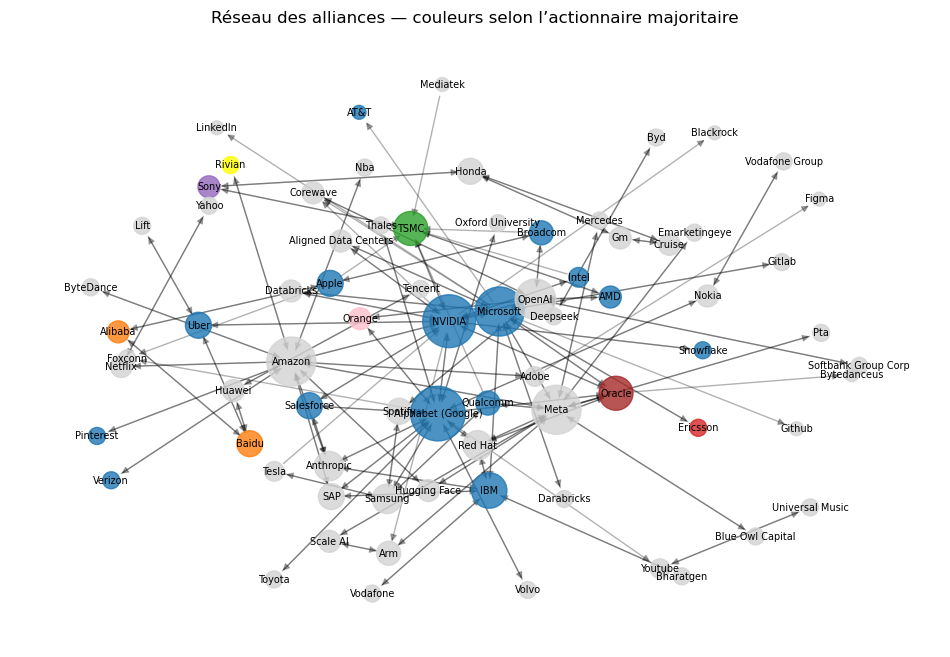

In [70]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(12,8))
pos = nx.spring_layout(G, k=0.6, seed=42)
colors = []
for n in G.nodes():
    sh = G.nodes[n].get("MajorShareholder","")
    if sh in ["Vanguard","BlackRock", "Primecap Management Company","National Developement Fund","Investor AB","Elon Musk ","French Gov", "Amazon", "Nomura Asset Management", "Ellison"]:
        colors.append({
            "Vanguard":"#1f77b4","BlackRock" : "blue", "Primecap Management Company":"#ff7f0e","National Developement Fund":"#2ca02c",
            "Investor AB":"#d62728","Nomura Asset Management":"#9467bd", "Elon Musk" : "green", "French Gov" : "pink", "Amazon" : "yellow", "Ellison" : "brown"
        }.get(sh, "gray"))
    else:
        colors.append("lightgray")
deg = dict(G.degree())       
node_sizes = [50 + deg[n]*50 for n in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=node_sizes, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=7)
plt.title("Réseau des alliances — couleurs selon l’actionnaire majoritaire")
plt.axis("off")
plt.show()


In [32]:
import pandas as pd, re, unicodedata

def canon(s: str) -> str:
    if not isinstance(s, str): return ""
    s = re.sub(r"\s*\([^)]*\)\s*$", "", s)  # retire les (A), (B), etc.
    s = s.replace("\u00a0"," ").strip().lower()
    s = unicodedata.normalize("NFKD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    s = re.sub(r"[^a-z0-9]+", "", s)
    return s

nodes_csv = pd.read_csv("companies_clean.csv", dtype=str).fillna("")
nodes_csv["canon_key"] = nodes_csv["Company"].map(canon)

canon_csv = set(nodes_csv["canon_key"])
canon_g = {canon(n) for n in G.nodes()}

not_found = sorted([n for n in G.nodes() if canon(n) not in canon_csv])

print(f"🔎 Entreprises dans le graphe : {len(G.nodes())}")
print(f"🗃 Entreprises dans le CSV : {len(nodes_csv)}")
print(f"⚠️ Nœuds du graphe sans correspondance dans le CSV : {len(not_found)}")
print("Exemples de nœuds non reconnus :", not_found[:20])


🔎 Entreprises dans le graphe : 75
🗃 Entreprises dans le CSV : 98
⚠️ Nœuds du graphe sans correspondance dans le CSV : 36
Exemples de nœuds non reconnus : ['Aligned Data Centers', 'Arm', 'Bharatgen', 'Blackrock', 'Blue Owl Capital', 'Byd', 'Bytedanceus', 'Corewave', 'Darabricks', 'Deepseek', 'Emarketingeye', 'Foxconn', 'Github', 'Gitlab', 'Gm', 'Honda', 'Lift', 'Mediatek', 'Mercedes', 'Meta']


## Alliances par pays